# GR5243 Group Project 1
##### Xingchen Ji, Yuting Wang, Hongyi Xu, and Jiacan Zhou

### Part 1. Library Importing and Data Loading

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('darkgrid')
%matplotlib inline

In [189]:
eta = pd.read_csv("../Data/RTA.csv")

In [190]:
eta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [191]:
eta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [192]:
eta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Part 2. Explanatory Data Analysis
#### (a) Response Variable

[Text(0.5, 1.0, 'Histogram of Accident Severity'),
 Text(0.5, 0, 'Accident Severity')]

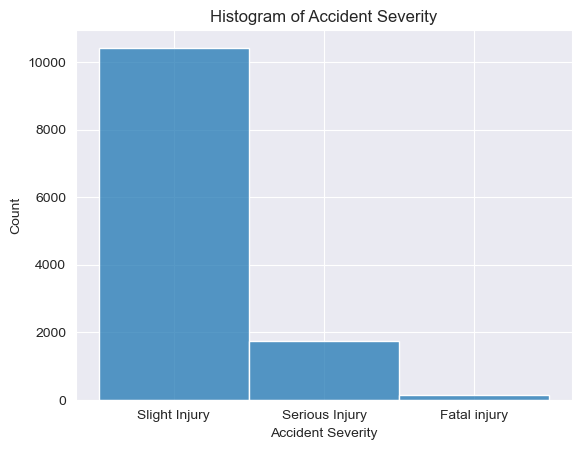

In [193]:
eta["Accident_severity"].value_counts()
sns.histplot(eta["Accident_severity"]).set(title = "Histogram of Accident Severity", xlabel = "Accident Severity")

#### (b) Data Cleaning and Feature Selection

In [194]:
eta.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [195]:
eta.drop(["Service_year_of_vehicle", "Defect_of_vehicle", "Work_of_casuality", "Fitness_of_casuality"], axis = 1, inplace = True)
eta.drop(["Time", "Weather_conditions", "Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity"], axis = 1, inplace = True)

In [196]:
categorical = [col for col in eta.columns]
categorical.remove("Number_of_vehicles_involved")
categorical.remove("Number_of_casualties")
numerical = ["Number_of_vehicles_involved", "Number_of_casualties"]

In [197]:
eta.dropna(subset = categorical, inplace = True)
eta.shape

(8439, 22)

In [198]:
eta.corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.224609
Number_of_casualties,0.224609,1.000000


In [199]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

eta_chi = eta.copy()
for col in categorical:
    eta_chi[col] = LabelEncoder().fit_transform(eta_chi[col])
chi2_selector = SelectKBest(chi2, k = 15)
x_kbest = eta_chi.drop("Accident_severity", inplace = False, axis = 1)
y_kbest = eta_chi["Accident_severity"]
chi2_selector.fit(x_kbest, y_kbest)
chi2_support = chi2_selector.get_support()
chi2_feature = x_kbest.loc[:, chi2_support].columns.tolist()
chi2_feature

['Day_of_week',
 'Age_band_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Cause_of_accident']

#### (c) Preprocessing Dataset for ML Models

In [200]:
eta_new = eta[chi2_feature]
eta_new.head()

,Day_of_week,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_surface_type,Road_surface_conditions,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident
1,Monday,31-50,Employee,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Asphalt roads,Dry,Daylight,Vehicle with vehicle collision,2,2,Going straight,Overtaking
3,Sunday,18-30,Employee,5-10yr,Public (> 45 seats),Office areas,other,Earth roads,Dry,Darkness - lights lit,Vehicle with vehicle collision,2,2,Going straight,Changing lane to the right
7,Friday,18-30,Employee,2-5yr,Automobile,Residential areas,other,Asphalt roads,Dry,Daylight,Vehicle with vehicle collision,2,1,U-Turn,No priority to vehicle
8,Friday,18-30,Employee,Above 10yr,Lorry (41?100Q),Industrial areas,other,Earth roads,Dry,Daylight,Collision with roadside-parked vehicles,2,1,Going straight,Changing lane to the right
9,Friday,18-30,Employee,1-2yr,Automobile,Residential areas,Undivided Two way,Asphalt roads,Dry,Daylight,Collision with roadside-parked vehicles,2,1,U-Turn,Moving Backward


In [201]:
eta_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 1 to 12315
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  8439 non-null   object
 1   Age_band_of_driver           8439 non-null   object
 2   Vehicle_driver_relation      8439 non-null   object
 3   Driving_experience           8439 non-null   object
 4   Type_of_vehicle              8439 non-null   object
 5   Area_accident_occured        8439 non-null   object
 6   Lanes_or_Medians             8439 non-null   object
 7   Road_surface_type            8439 non-null   object
 8   Road_surface_conditions      8439 non-null   object
 9   Light_conditions             8439 non-null   object
 10  Type_of_collision            8439 non-null   object
 11  Number_of_vehicles_involved  8439 non-null   int64 
 12  Number_of_casualties         8439 non-null   int64 
 13  Vehicle_movement             843

In [202]:
categorical_new = [col for col in eta_new.columns]
categorical_new.remove("Number_of_vehicles_involved")
categorical_new.remove("Number_of_casualties")
numerical_new = ["Number_of_vehicles_involved", "Number_of_casualties"]

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eta_new[numerical_new] = scaler.fit_transform(eta_new[numerical_new])
X = pd.get_dummies(eta_new, columns = categorical_new, drop_first = True)
y = eta["Accident_severity"]
X.head()

C:\Users\86137\AppData\Local\Temp\ipykernel_6884\2399200865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eta_new[numerical_new] = scaler.fit_transform(eta_new[numerical_new])


,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,-0.055876,0.446105,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.055876,0.446105,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.055876,-0.539413,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,-0.055876,-0.539413,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.055876,-0.539413,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### (d) Data Spliting

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

### Part 3. Model Selection
#### (a) Naive Bayes Classification

Accuracy score:  0.06872037914691943
Classification report:                  precision    recall  f1-score   support

  Fatal injury       0.01      0.65      0.02        31
Serious Injury       0.14      0.25      0.18       357
 Slight Injury       0.93      0.03      0.06      2144

      accuracy                           0.07      2532
     macro avg       0.36      0.31      0.09      2532
  weighted avg       0.81      0.07      0.08      2532



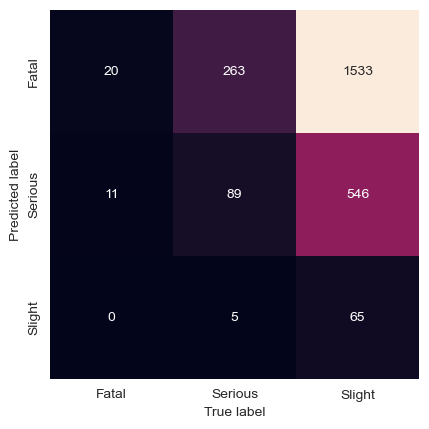

In [205]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred = nbc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [206]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nbc, X, y, cv = 10)
print("Cross validation scores: ", scores)
print("Mean cross validation score: ", scores.mean())

Cross validation scores:  [0.08293839 0.06042654 0.07109005 0.06990521 0.06042654 0.06635071
 0.07345972 0.07464455 0.08175355 0.08066429]
Mean cross validation score:  0.07216595548509329


#### (b) SVM

Accuracy score:  0.8467614533965245
Classification report:                  precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.00      0.00      0.00       357
 Slight Injury       0.85      1.00      0.92      2144

      accuracy                           0.85      2532
     macro avg       0.28      0.33      0.31      2532
  weighted avg       0.72      0.85      0.78      2532



d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


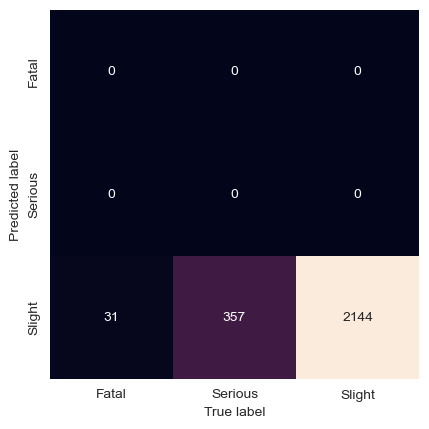

In [207]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear", C = 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [208]:
scores = cross_val_score(svc, X, y, cv = 10)
print("Cross validation scores: ", scores)
print("Mean cross validation score: ", scores.mean())

Cross validation scores:  [0.84952607 0.84952607 0.84952607 0.84952607 0.84952607 0.84952607
 0.84952607 0.84952607 0.84952607 0.84934757]
Mean cross validation score:  0.8495082165365175


#### (c) Decision Tree

Accuracy score:  0.8467614533965245
Classification report:                  precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.48      0.04      0.08       357
 Slight Injury       0.85      0.99      0.92      2144

      accuracy                           0.85      2532
     macro avg       0.45      0.35      0.33      2532
  weighted avg       0.79      0.85      0.79      2532



d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


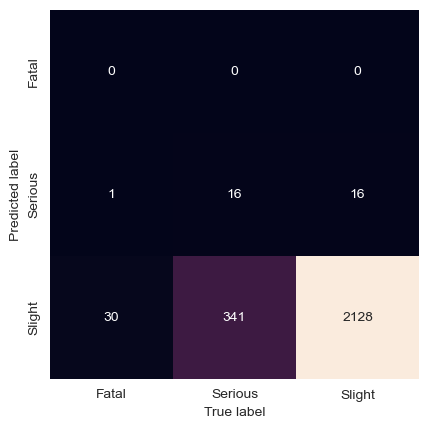

In [209]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [210]:
scores = cross_val_score(dtc, X, y, cv = 10)
print("Cross validation scores: ", scores)
print("Mean cross validation score: ", scores.mean())

Cross validation scores:  [0.85900474 0.8471564  0.84597156 0.83530806 0.8507109  0.84241706
 0.84241706 0.83293839 0.85189573 0.84816133]
Mean cross validation score:  0.8455981233801644


#### (d) Random Forest

Accuracy score:  0.8467614533965245
Classification report:                  precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        31
Serious Injury       0.00      0.00      0.00       357
 Slight Injury       0.85      1.00      0.92      2144

      accuracy                           0.85      2532
     macro avg       0.28      0.33      0.31      2532
  weighted avg       0.72      0.85      0.78      2532



d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\envs\text-mine\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


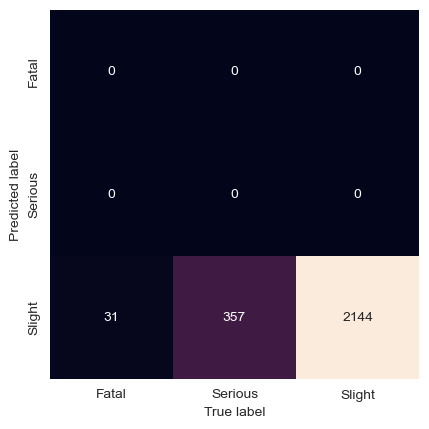

In [211]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [212]:
scores = cross_val_score(rfc, X, y, cv = 10)
print("Cross validation scores: ", scores)
print("Mean cross validation score: ", scores.mean())

Cross validation scores:  [0.84952607 0.84952607 0.84952607 0.84952607 0.84952607 0.84952607
 0.84952607 0.84952607 0.84952607 0.84934757]
Mean cross validation score:  0.8495082165365175


### Part 4. Model Comparison

In [213]:
models = pd.DataFrame({
    "Model": ["Naive Bayes", "Support Vector Machine", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, nbc.predict(X_test)), accuracy_score(y_test, svc.predict(X_test)), accuracy_score(y_test, dtc.predict(X_test)), accuracy_score(y_test, rfc.predict(X_test))]})
models.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,Support Vector Machine,0.846761
2,Decision Tree,0.846761
3,Random Forest,0.846761
0,Naive Bayes,0.068720


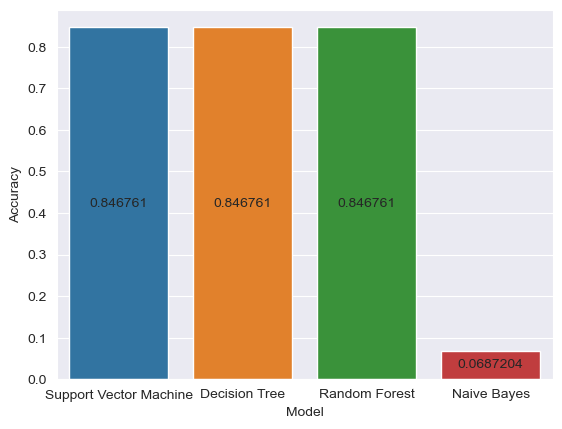

In [214]:
# make a plot showing the accuracy of each model
ax = sns.barplot(x = "Model", y = "Accuracy", data = models.sort_values(by = "Accuracy", ascending = False))
for acc in ax.containers:
    ax.bar_label(acc, label_type = "center");